## Observations and Insights 

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouseMerge = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
# Display the data table for preview
mouseMerge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [80]:
# Checking the number of mice.
numMice = mouseMerge['Mouse ID'].nunique()
numMice

249

In [81]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouseMerge['Mouse ID'].duplicated(keep='first')

0       False
1        True
2        True
3        True
4        True
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Name: Mouse ID, Length: 1893, dtype: bool

In [82]:
# Optional: Get all the data for the duplicate mouse ID. 


In [83]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanDF = mouseMerge.drop_duplicates()
cleanDF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [84]:
# Checking the number of mice in the clean DataFrame.
numMice = cleanDF['Mouse ID'].nunique()
numMice

249

## Summary Statistics

In [85]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumorGroup = cleanDF.groupby('Drug Regimen')
tumorMean = tumorGroup['Tumor Volume (mm3)'].mean()
tumorMedian = tumorGroup['Tumor Volume (mm3)'].median()
tumorVar = tumorGroup['Tumor Volume (mm3)'].var()
tumorStd = tumorGroup['Tumor Volume (mm3)'].std()
tumorSem = tumorGroup['Tumor Volume (mm3)'].sem()
tumorDF = pd.DataFrame({'Average Tumor Vol': tumorMean,
                       'Median Tumor Size': tumorMedian,
                       'Variance in Tumor Size': tumorVar,
                       'Standard Deviation': tumorStd,
                       'SEM': tumorSem})
tumorDF

,Average Tumor Vol,Median Tumor Size,Variance in Tumor Size,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [86]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summDF = cleanDF.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summDF

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.368318  50.909965  42.278090  6.502160  0.514041
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Trials')

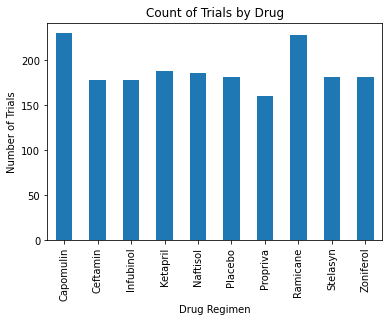

In [106]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
groupDF = pd.DataFrame(cleanDF.groupby(['Drug Regimen']).count()).reset_index()
count = groupDF[['Drug Regimen', 'Mouse ID']]
count.columns = ['Drug Regimen', 'Number of Trials']
count = count.set_index('Drug Regimen')
fig1 = count.plot(kind='bar', title='Count of Trials by Drug', legend=False)
fig1.set_ylabel('Number of Trials')

Text(0.5, 1.0, 'Mice on Regimen by Drug')

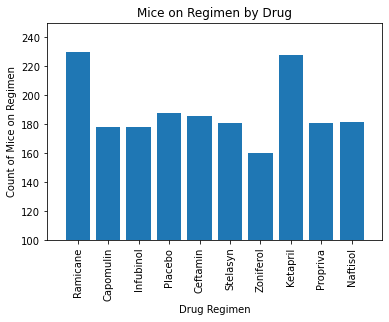

In [135]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
xaxis = cleanDF['Drug Regimen'].unique().tolist()
yaxis = tumorGroup['Mouse ID'].count().tolist()
plt.bar(xaxis, yaxis)
plt.xlim(-1, 10)
plt.xticks(rotation = 90)
plt.ylim(100, 250)
plt.xlabel('Drug Regimen')
plt.ylabel('Count of Mice on Regimen')
plt.title('Mice on Regimen by Drug')

<AxesSubplot:title={'center':'Percentage of Male and Female Mice in Study'}, ylabel='Sex'>

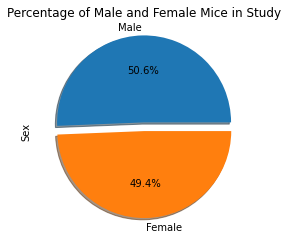

In [146]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
fig2 = cleanDF['Sex'].value_counts().plot(kind='pie', shadow=True,
                                          explode=[0.1, 0], autopct='%0.1f%%',
                                         title='Percentage of Male and Female Mice in Study')
fig2

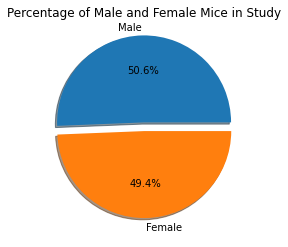

In [154]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
values = [len(cleanDF[cleanDF['Sex'] == 'Male']), len(cleanDF[cleanDF['Sex'] == 'Female'])]
plt.pie(values, labels=labels, shadow=True, explode=[0.1, 0], autopct='%0.1f%%')
plt.title('Percentage of Male and Female Mice in Study')
plt.show()

## Quartiles, Outliers and Boxplots

In [169]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regs = mouseMerge[mouseMerge['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
# Start by getting the last (greatest) timepoint for each mouse
volDF = regs.loc[regs['Timepoint'] == regs['Timepoint'].max()]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumorvolDF = pd.merge(volDF, mouseMerge, on=("Mouse ID","Timepoint"),how="left")
volDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [180]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = volDF['Drug Regimen'].unique().tolist()
# Create empty list to fill with tumor vol data (for plotting)
volData = {'Capomulin': [], 'Ramicane': [], 'Infubinol': [], 'Ceftamin': []}
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quarts = volDF.groupby('Drug Regimen')['Tumor Volume (mm3)'].quantile([.25, .5, .75])
    # Locate the rows which contain mice on each drug and get the tumor volumes
for row in volDF:
    
    # Determine outliers using upper and lower bounds
lowerQuart = quarts[0]
upperQuart = quarts[2]
iqr = upperQuart - lowerQuart
lowerBound = lowerQuart - (1.5*iqr)
upperBound = upperQuart + (1.5*iqr)

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
